In [ ]:

pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# For data handling and numerical operations

import pandas as pd
import numpy as np

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For the k-NN algorithm
from sklearn.neighbors import KNeighborsClassifier

# For evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# For plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns

# To ensure plots are displayed inline in the notebook
%matplotlib inline

In [ ]:
pip install kagglehub[pandas-datasets] kaggle

In [ ]:
# Load the dataset from the CSV file into a pandas DataFrame
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows to see what the data looks like
print("First 5 records of the dataset:")
df.head()

First 5 records of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# a. Find the total number of records

In [ ]:
# Get the number of rows and columns
rows, columns = df.shape

print(f"The total number of records (rows) is: {rows}")
print(f"The total number of attributes (columns) is: {columns}")

The total number of records (rows) is: 768
The total number of attributes (columns) is: 9


# b. Find the attributes and their types

In [ ]:
# Get information about each attribute, including its type
print("Attributes and their types:")
df.info()

Attributes and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# c. Find the range of values for numerical variables


In [ ]:
# Get descriptive statistics for all numerical columns
print("Range of values for numerical attributes:")
df.describe()

Range of values for numerical attributes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# d. Retrieve Train and Test Dataset

In [ ]:
# Separate the features (all columns except 'Outcome')
X = df.drop('Outcome', axis=1)

# Separate the target variable ('Outcome')
y = df['Outcome']

# Split the data into training (80%) and testing (20%) sets
# random_state ensures that the split is the same every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


# e to k: Apply k-NN, Predict, and Evaluate for K=1 to 20

In [ ]:
# Create an empty list to store accuracy scores for each K value
accuracy_scores = []

# Loop through K values from 1 to 20
for k in range(1, 21):
    print(f"================== K = {k} ==================")

    # e, f: Create and train the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # g: Predict the labels for the test data
    y_pred = knn.predict(X_test)

    # h: Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # i: Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    print(f"\nTrue Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")

    # j: Calculate and print performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Store the accuracy
    accuracy_scores.append(accuracy)

    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # k: Calculate and print MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.4f}\n")

================== K = 1 ==================
Confusion Matrix:
[[70 29]
 [21 34]]

True Negatives (TN): 70
False Positives (FP): 29
False Negatives (FN): 21
True Positives (TP): 34

Accuracy: 0.6753
Precision: 0.5397
Recall: 0.6182
F1-Score: 0.5763
Mean Squared Error (MSE): 0.3247

================== K = 2 ==================
Confusion Matrix:
[[88 11]
 [35 20]]

True Negatives (TN): 88
False Positives (FP): 11
False Negatives (FN): 35
True Positives (TP): 20

Accuracy: 0.7013
Precision: 0.6452
Recall: 0.3636
F1-Score: 0.4651
Mean Squared Error (MSE): 0.2987

================== K = 3 ==================
Confusion Matrix:
[[65 34]
 [20 35]]

True Negatives (TN): 65
False Positives (FP): 34
False Negatives (FN): 20
True Positives (TP): 35

Accuracy: 0.6494
Precision: 0.5072
Recall: 0.6364
F1-Score: 0.5645
Mean Squared Error (MSE): 0.3506

================== K = 4 ==================
Confusion Matrix:
[[82 17]
 [28 27]]

True Negatives (TN): 82
False Positives (FP): 17
False Negatives (FN): 2

# l. Plot Accuracy vs. K-Value and Find the Best K

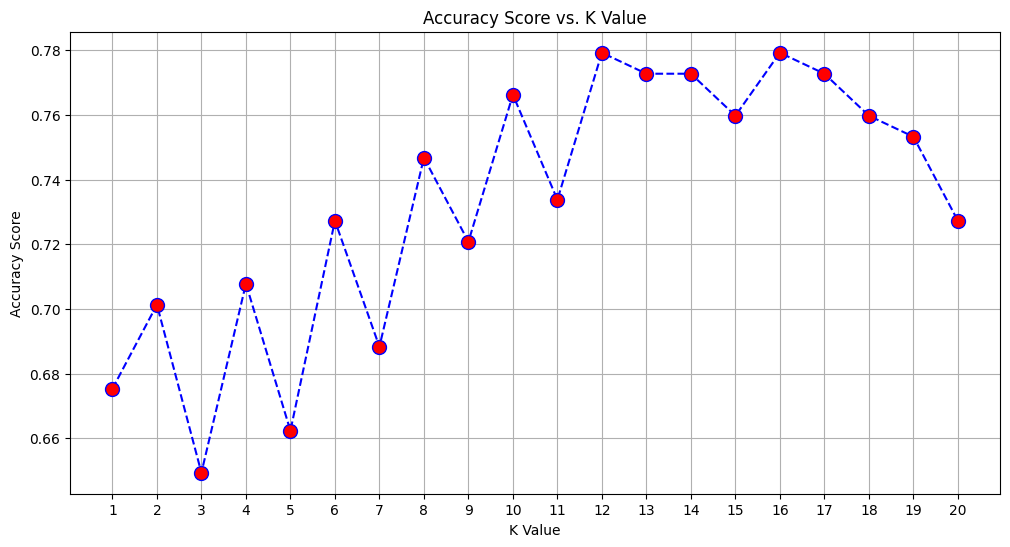

The best performing K value is 12 with an accuracy of 0.7792.


In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# Add titles and labels
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.xticks(range(1, 21)) # Ensure x-axis ticks are integers from 1 to 20
plt.grid(True)
plt.show()

# Find the best K value
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
best_accuracy = max(accuracy_scores)

print(f"The best performing K value is {best_k} with an accuracy of {best_accuracy:.4f}.")

In [ ]:
# Recreate and train the KNN model using the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict again using the best K
y_pred_best = knn_best.predict(X_test)

# Get the confusion matrix for the best K
cm_best_k = confusion_matrix(y_test, y_pred_best)
print("Confusion matrix for best K:")
print(cm_best_k)


Confusion matrix for best K:
[[89 10]
 [24 31]]


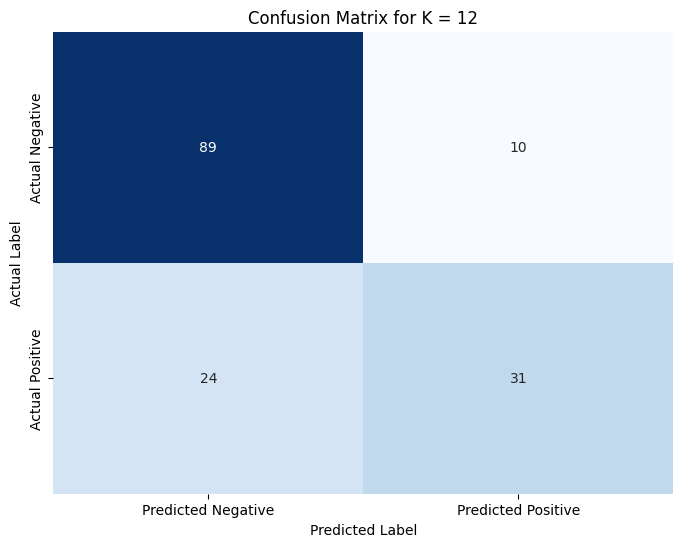

In [ ]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_k, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



plt.title(f'Confusion Matrix for K = {best_k}')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()